In [56]:
import boto3
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

## Definimos algunos metodos para simplificar la lectura de la notebook

In [6]:
def get_image_bytes(image):
    # Leemos una imagen y retornamos su informacion en bytes
    try:
        with open(image, 'rb') as i:
            return i.read()
        
    except Exception as e:
        print(str(e))

## AWS credentials and service selection

In [10]:
## Selecting profile credentials
session = boto3.session.Session(profile_name='aws_academy')

## Selecting AWS Service
client = session.client(service_name='textract')

## Detecting Document Text

In [4]:
!ls

amazon_textract.ipynb  handwriting_1.jpg  receipt_1.jpg


In [11]:
response = client.detect_document_text(Document={'Bytes': get_image_bytes('handwriting_1.jpg')})

In [12]:
response

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 0.9982770085334778,
     'Height': 0.9987014532089233,
     'Left': 0.0017230099765583873,
     'Top': 0.0012985493522137403},
    'Polygon': [{'X': 0.0017230099765583873, 'Y': 0.0012985493522137403},
     {'X': 1.0, 'Y': 0.0013033327413722873},
     {'X': 1.0, 'Y': 1.0},
     {'X': 0.0017352201975882053, 'Y': 1.0}]},
   'Id': '4e63f877-cb44-4f61-bab1-dd89b871bed1',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['fdbe780b-a831-496c-8fdd-6ef340e721a0',
      '0e79eeca-0234-4f72-8844-1be8aad84f37',
      'ac93da21-de4a-402d-a29e-0793338380ba',
      '3e0304c1-662e-47e6-8328-f89ae2146a5b',
      'a9ac5809-4a0d-47a5-912c-f432219acd11',
      '6f078949-e2d8-45e9-b1fc-600e01434303',
      '79446877-2bf3-4421-9585-401cd0a22ff6',
      'bad758cb-c3f0-4858-85a7-db52b8d063b1',
      'c1fc0fde-0aa0-4237-8896-e27abb8a880f',
      'cf27bf26-5851-4488-ae41-7e1af295d629']}]},
  {'BlockTy

In [13]:
for block in response['Blocks']:
    if block['BlockType'] == 'LINE':
        print(block['Text'])

Hello, everyone! I made a Reddit account solely
for the purpose of posting this. I often get
compliments on my handwriting in school and
I'm curious to see what this thread thinks.
I guess I'll write a few more lines so that
you all have more content to evaluate. I'm
writing these words as they come to mind, so
don't judge me for any grammatical errors. I hope
this post doesn't get zero upvotes, that would be
embarrassing. Thanks!


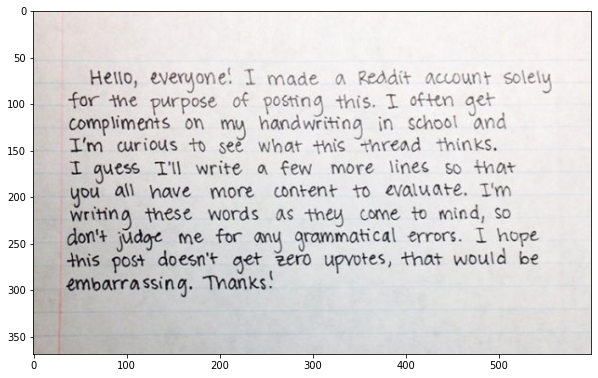

In [19]:
plt.figure(figsize=(10,10))
im = Image.open("handwriting_1.jpg")
plt.imshow(im);

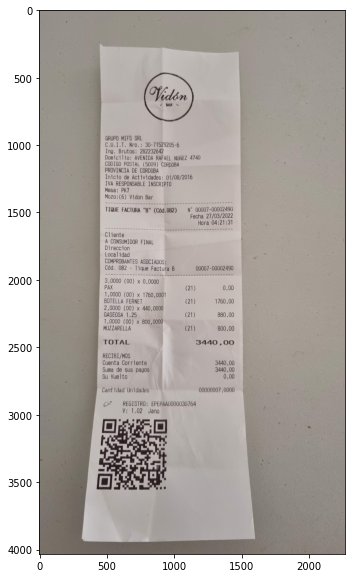

In [20]:
plt.figure(figsize=(10,10))
im = Image.open("receipt_1.jpg")
plt.imshow(im);

In [21]:
response = client.detect_document_text(Document={'Bytes': get_image_bytes('receipt_1.jpg')})

In [22]:
for block in response['Blocks']:
    if block['BlockType'] == 'LINE':
        print(block['Text'])

Vidan
BAN
GRUPO MIFS SRL
C.U.I.T. Nro. : 30-71529205-6
Ing. Brutos: 282232642
Domicilio: AVENIDA RAFAEL NUÑEZ 4740
CODIGO POSTAL (5009) CORDOBA
PROVINCIA DE CORDOBA
Inicio de Actividades: 01/08/2016
IVA RESPONSABLE INSCRIPTO
Mesa: PK7
Mozo:(6) Vidon Bar
TIQUE FACTURA "B" (Cód.082)
N° 00007-00002490
Fecha 27/03/2022
Hora 04:21:31
Cliente
A CONSUMIDOR FINAL
Direccion
Localidad
COMPROBANTES ASOCIADOS:
Cód. 082 - Tique Factura B
00007-00002490
3,0000 (00) X 0,0000
PAX
(21)
0,00
1,0000 (00) X 1760,0001
BOTELLA FERNET
(21)
1760,00
2,0000 (00) X 440,0000
GASEOSA 1.25
(21)
880,00
1,0000 (00) X 800,0000
MUZZARELLA
(21)
800,00
TOTAL
3440,00
RECIBI/MOS
Cuenta Corriente
3440.00
Suma de sus pagos
3440.00
Su Vuelto
0,00
Cantidad Unidades
00000007,0000
OF
REGISTRO: EPEPAA0000030764
V: 1.02 Jano


## Analyzing Invoices and Receipts 

In [23]:
response = client.analyze_expense(Document={'Bytes': get_image_bytes('receipt_1.jpg')})

In [24]:
response

{'DocumentMetadata': {'Pages': 1},
 'ExpenseDocuments': [{'ExpenseIndex': 1,
   'SummaryFields': [{'Type': {'Text': 'VENDOR_NAME',
      'Confidence': 98.59927368164062},
     'ValueDetection': {'Text': 'Vidan\nBAN',
      'Geometry': {'BoundingBox': {'Width': 0.12604932487010956,
        'Height': 0.04065687954425812,
        'Left': 0.3593553304672241,
        'Top': 0.13785584270954132},
       'Polygon': [{'X': 0.3600464463233948, 'Y': 0.13785584270954132},
        {'X': 0.4851239025592804, 'Y': 0.1402955800294876},
        {'X': 0.4854046702384949, 'Y': 0.17851272225379944},
        {'X': 0.3593553304672241, 'Y': 0.17617982625961304}]},
      'Confidence': 98.51007843017578},
     'PageNumber': 1},
    {'Type': {'Text': 'OTHER', 'Confidence': 97.5},
     'LabelDetection': {'Text': 'Cantidad Unidades',
      'Geometry': {'BoundingBox': {'Width': 0.15583612024784088,
        'Height': 0.012822948396205902,
        'Left': 0.20594339072704315,
        'Top': 0.6923786401748657},
    

In [34]:
response['ExpenseDocuments'][0].keys()

dict_keys(['ExpenseIndex', 'SummaryFields', 'LineItemGroups'])

In [37]:
response['ExpenseDocuments'][0]['LineItemGroups'][0].keys()

dict_keys(['LineItemGroupIndex', 'LineItems'])

In [40]:
len(response['ExpenseDocuments'][0]['LineItemGroups'][0]['LineItems'])

5

In [ ]:
branca_obj = None

In [50]:
for line in response['ExpenseDocuments'][0]['LineItemGroups'][0]['LineItems']:
    for field in line['LineItemExpenseFields']:
        print(field['Type']['Text'], ': ',field['ValueDetection']['Text'])
        if field['Type']['Text'] == 'ITEM' and 'FERNET' in field['ValueDetection']['Text']:
            branca_obj = field

ITEM :  Cód. 082 - Tique Factura B
PRICE :  00007-00002490
QUANTITY :  Cód.
EXPENSE_ROW :  COMPROBANTES ASOCIADOS:
Cód. 082 - Tique Factura B 00007-00002490
ITEM :  PAX
PRICE :  0,00
EXPENSE_ROW :  3,0000 (00) X 0,0000
PAX (21) 0,00
ITEM :  BOTELLA FERNET
PRICE :  1760,00
EXPENSE_ROW :  1,0000 (00) X 1760,0001
BOTELLA FERNET (21) 1760,00
ITEM :  GASEOSA 1.25
PRICE :  880,00
EXPENSE_ROW :  2,0000 (00) X 440,0000
GASEOSA 1.25 (21) 880,00
1,0000 (00) X 800,0000
ITEM :  MUZZARELLA
PRICE :  800,00
EXPENSE_ROW :  1,0000 (00) X 800,0000
MUZZARELLA (21) 800,00


## ¿A dónde está el fernet?

In [51]:
branca_obj

{'Type': {'Text': 'ITEM', 'Confidence': 99.08415222167969},
 'ValueDetection': {'Text': 'BOTELLA FERNET',
  'Geometry': {'BoundingBox': {'Width': 0.12686876952648163,
    'Height': 0.01302684098482132,
    'Left': 0.21079561114311218,
    'Top': 0.5288993120193481},
   'Polygon': [{'X': 0.2113267034292221, 'Y': 0.5288993120193481},
    {'X': 0.3376643657684326, 'Y': 0.5300731062889099},
    {'X': 0.33741649985313416, 'Y': 0.5419261455535889},
    {'X': 0.21079561114311218, 'Y': 0.5407887101173401}]},
  'Confidence': 99.07206726074219},
 'PageNumber': 1}

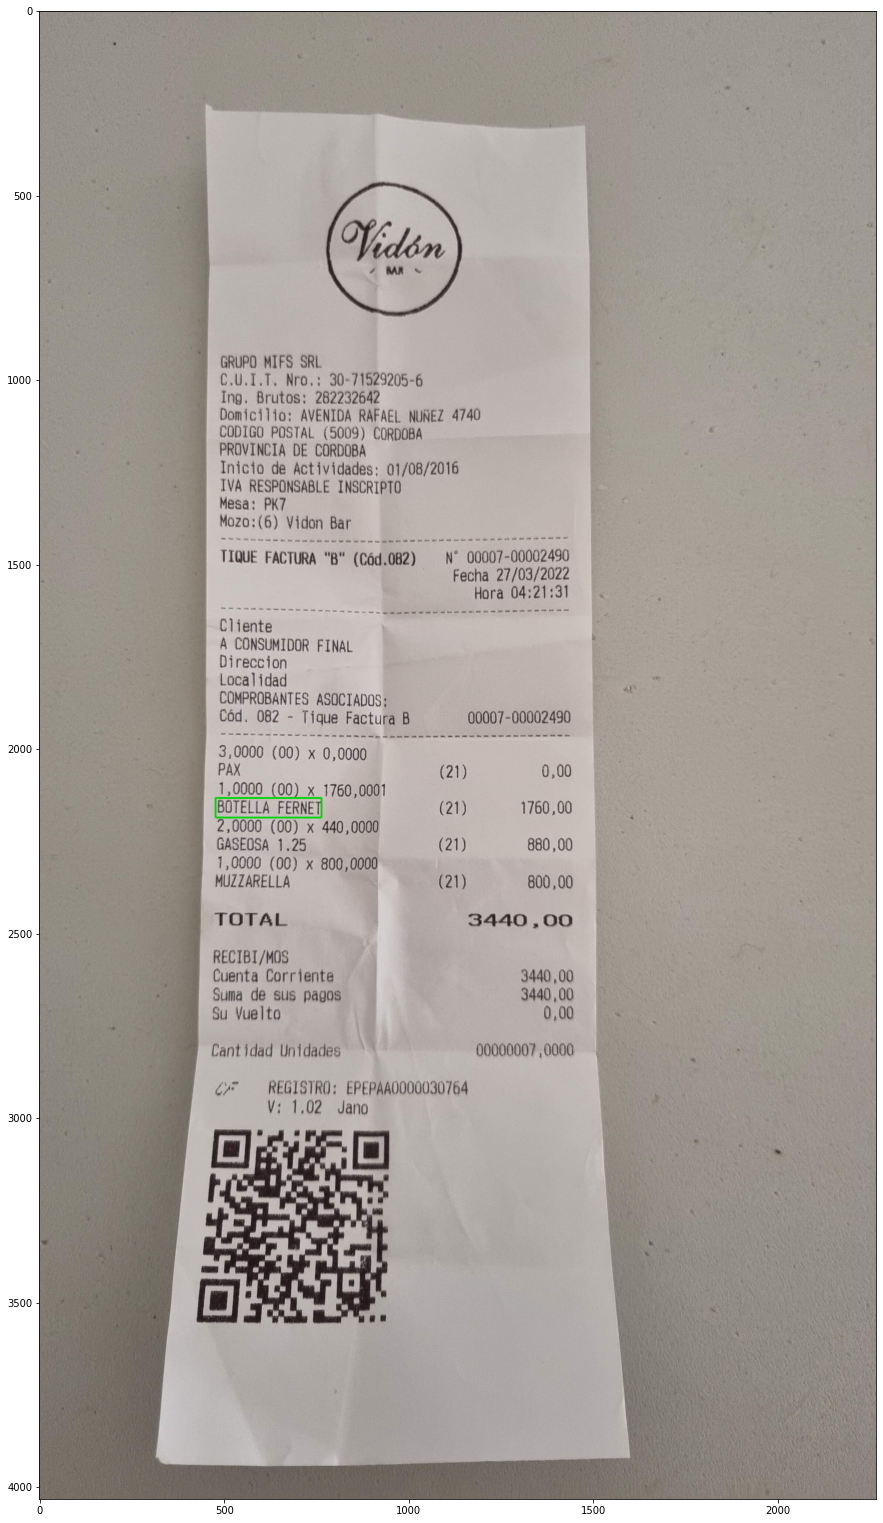

In [59]:
plt.figure(figsize=(15,30))
img = Image.open('receipt_1.jpg')

imgWidth, imgHeight = img.size

draw = ImageDraw.Draw(img)

box = branca_obj['ValueDetection']['Geometry']['BoundingBox']
left = imgWidth * box['Left']
top = imgHeight * box['Top']
width = imgWidth * box['Width']
height = imgHeight * box['Height']

points = (
            (left,top), 
            (left+width,top),
            (left+width,top+height), 
            (left,top+height), 
            (left,top),
        )

draw.line(points, fill='#00d400', width=5)
plt.imshow(img);